In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import sys
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("..")

In [3]:
import colonist_ql.interface_interaction.feature_extration as fe
import colonist_ql.interface_interaction.game_image_extraction as ie
import colonist_ql.game_structure.visualise as visualise

image = ie.game_image()

In [29]:
hexes = fe.initial_board_extraction(image)


C:\Users\Zac\Documents\GitHub\ColonistQLearning\colonist_ql\interface_interaction\feature_extration.py:190: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  results[t] = measure.compare_ssim(image, test_image, multichannel=True)


TILES.SEA lightgreen
RESOURCES.GRAIN lightgreen
RESOURCES.BRICK lightgreen
RESOURCES.ORE lightgreen
RESOURCES.ORE lightgreen
RESOURCES.WOOL lightgreen
TILES.SEA lightgreen
TILES.SEA lightgreen
TILES.SEA lightgreen
TILES.DESERT lightgreen
TILES.SEA lightgreen
TILES.SEA lightgreen
TILES.SEA lightgreen
TILES.SEA lightgreen
RESOURCES.LUMBER lightgreen
TILES.SEA lightgreen
TILES.SEA lightgreen
RESOURCES.WOOL lightgreen
RESOURCES.ORE lightgreen
RESOURCES.WOOL lightgreen
TILES.SEA lightgreen
RESOURCES.BRICK lightgreen
RESOURCES.LUMBER lightgreen
TILES.SEA lightgreen
TILES.SEA lightgreen
RESOURCES.GRAIN lightgreen
TILES.SEA lightgreen
RESOURCES.LUMBER lightgreen
RESOURCES.WOOL lightgreen
RESOURCES.GRAIN lightgreen
TILES.SEA lightgreen
RESOURCES.LUMBER lightgreen
RESOURCES.BRICK lightgreen
TILES.SEA lightgreen
TILES.SEA lightgreen
TILES.SEA lightgreen
RESOURCES.GRAIN lightgreen
Port trading 2:1 brick on S 10 P and 10 P 9.
Port trading 2:1 brick on S 10 P and 10 P 9.
Port trading 3:1 on P 8 S an

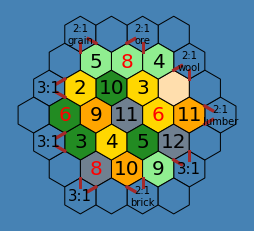

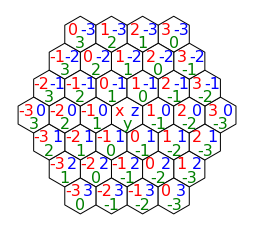

In [30]:
visualise.draw_board(hexes)
visualise.draw_coords(hexes)

In [22]:
from colonist_ql.game_structure.board import Board
import colonist_ql.game_structure.structures as structures

for h in hexes:
    structures.Hexes().add(h)



In [10]:
import colonist_ql.analytics.visualise as av
import colonist_ql.analytics.analytics as analytics

av.plot_expected_i2c3()
av.plot_expected_i3c5()

KeyError: (0, 0, 0)

In [19]:
for p in structures.Ports().get_all():
    print(p)



Port trading 2:1 brick on S 10 P and 10 P 9.
Port trading 2:1 brick on S 10 P and 10 P 9.
Port trading 3:1 on P 8 S and S P 8.
Port trading 3:1 on P 8 S and S P 8.
Port trading 3:1 on 9 12 P and 12 P S.
Port trading 3:1 on 9 12 P and 12 P S.
Port trading 3:1 on P 6 3 and P S 3.
Port trading 3:1 on P 6 3 and P S 3.
Port trading 2:1 lumber on 11 S P and 11 S P.
Port trading 2:1 lumber on 11 S P and 11 S P.
Port trading 3:1 on P S 2 and P 6 2.
Port trading 3:1 on P S 2 and P 6 2.
Port trading 2:1 wool on 4 S P and S P S.
Port trading 2:1 wool on 4 S P and S P S.
Port trading 2:1 ore on S 8 P and 8 P 4.
Port trading 2:1 ore on S 8 P and 8 P 4.
Port trading 2:1 grain on P 5 S and S P 5.
Port trading 2:1 grain on P 5 S and S P 5.
